# Fitting a Moffat function to a series of FITS images from a focus sweep.

Import a number of libraries, numpy, fits, pyplot, Axes3D, ndimage, models, fitting, LogNorm, warnings.

Creat an empty numpy array.

In [1]:
import os
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import ndimage
from astropy.modeling import models, fitting
from matplotlib.colors import LogNorm
import warnings

a = np.array([])
print(type(a))


<class 'numpy.ndarray'>


Open one of our focus sweep FITS files, print its shape, and display using a LogNorm gray color map.

(150, 150)


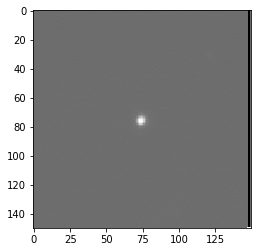

In [2]:
hdul = fits.open("./gwaves-test2/62_300.fits")
data = hdul[0].data
print(data.shape)

plt.figure()
plt.imshow(data, cmap='gray', norm=LogNorm())
plt.show()

Here, I'm trying to find the center of the star using center_of_mass.

Then I cut out a 30 x 30 piece of the image data centered on this center_of_mass.

Plot the fit data using gray scale LogNorm.

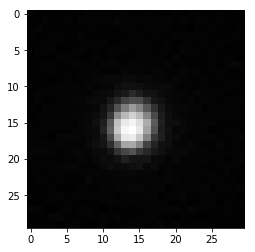

In [3]:
position = ndimage.measurements.center_of_mass(data[25:125,25:125])
posx = int(round(position[0])) + 25
posy = int(round(position[1])) + 25
position = ndimage.measurements.center_of_mass(data[posx-50:posx+50,
                                                    posy-50:posy+50])
posx = int(round(position[0])) + 25
posy = int(round(position[1])) + 25
myfitdata = data[posx-15:posx+15,
                 posy-15:posy+15]
#print(myfitdata)
plt.figure()
plt.imshow(myfitdata, cmap='gray', norm=LogNorm())


Now, I want to remove the background as best I can so the fitting function will work well.

I determine the indexes into my data array where the data is in the lower 98% of values.

I average these pixels to get a background value and subtract that value from the data.

Now the background should be near zero and I display the resulting image.

831


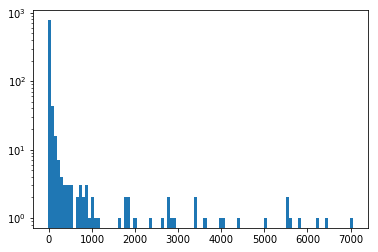

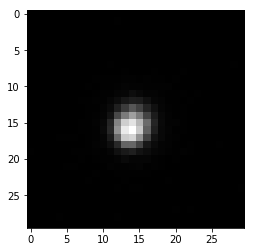

In [4]:
thresh = np.percentile(data, 98.0)
idx = data[:,:] < thresh
bval = np.average(data[idx])
plt.yscale('log', nonposy='clip')
print(int(bval))
myfitdata = myfitdata - bval
histogram = plt.hist(myfitdata.flatten(), 100)
plt.figure()
plt.imshow(myfitdata, cmap="gray", vmin = 0, vmax = 7000)

Next, plot the image larger, using the default color map, and use bicubic interpolation to smooth it.

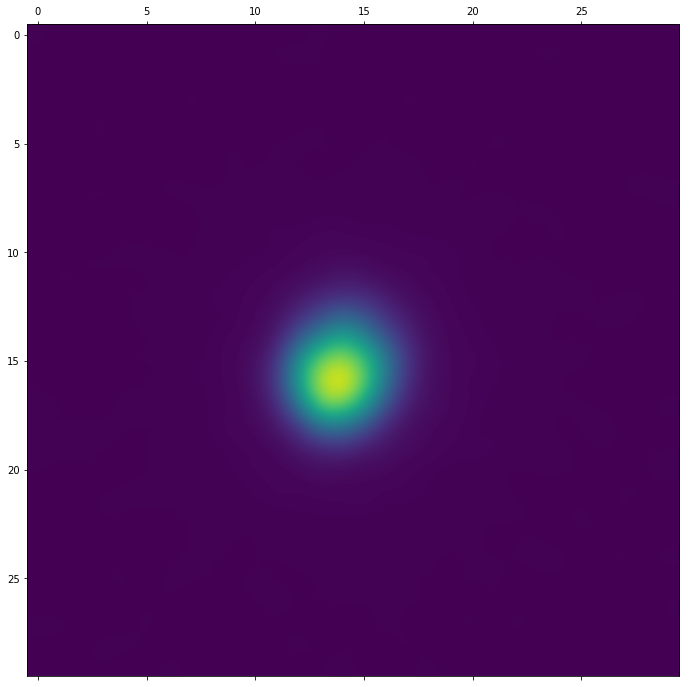

In [5]:
fig, axs = plt.subplots(1, 1, figsize=(12,12))
axs.matshow(myfitdata, interpolation="bicubic")

Moffat Function
$$f(x, y) = A \left(1 + \frac{\left(x - x_{0}\right)^{2} +
\left(y - y_{0}\right)^{2}}{\gamma^{2}}\right)^{- \alpha}$$
alpha is power index of Moffat model

gamma is core width of Moffat model

A is amplitude

For the astropy modeling fitter LevMarLSQFitter
Arguments are:

    model
    
    x coords
    
    y coords
    
    data
    
We use the Levenberg Marquardt Least Squares fitter to fit the Moffet function to the data.

Along the way, we use numpy mgrid to make two arrays of coordinates needed by the fitter.

I print one of these out to show what they look like.

In [6]:
xmod = models
p_init = xmod.Moffat2D(x_0=15, y_0=15, alpha=0.0)
        
        
xfit = fitting
fit_p = xfit.LevMarLSQFitter()

Xin, Yin = np.mgrid[0:30, 0:30]
print(Xin)
#print(Yin)

with warnings.catch_warnings():
    # Ignore model linearity warning from the fitter
    warnings.simplefilter('ignore')
    p = fit_p(p_init, Xin, Yin, myfitdata)
        
 

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
   1  1  1  1  1  1]
 [ 2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
   2  2  2  2  2  2]
 [ 3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
   3  3  3  3  3  3]
 [ 4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
   4  4  4  4  4  4]
 [ 5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
   5  5  5  5  5  5]
 [ 6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
   6  6  6  6  6  6]
 [ 7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7
   7  7  7  7  7  7]
 [ 8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
   8  8  8  8  8  8]
 [ 9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
   9  9  9  9  9  9]
 [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 

Now plot the image again and overplot a contour plot of the calculated Moffat function.

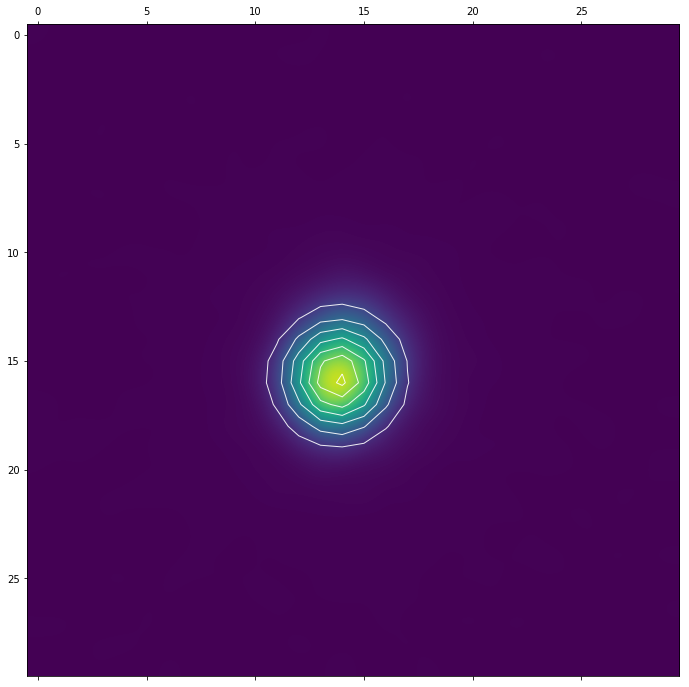

<Figure size 432x288 with 0 Axes>

In [7]:
fig, axs = plt.subplots(1, 1, figsize=(12,12))
plt.figure()
#plt.imshow(myfitdata, cmap='gray', norm=LogNorm())
axs.matshow(myfitdata, interpolation="bicubic")


axs.contour(p(Xin, Yin), colors='white', alpha=.9, linewidths=1)

Print a few of the parameters of the fit.

In [8]:
print (p.x_0)
print (p.y_0)
print (p.fwhm)
print()
print(p)

Parameter('x_0', value=15.713283597153536)
Parameter('y_0', value=13.8314249939412)
3.786809153760369

Model: Moffat2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
        amplitude            x_0         ...       gamma             alpha      
    ----------------- ------------------ ... ----------------- -----------------
    7388.548796699928 15.713283597153536 ... 53.09715703439633 545.4527390625818


Now, use a 3D projection to make a surface plot of the fitted Moffat function.

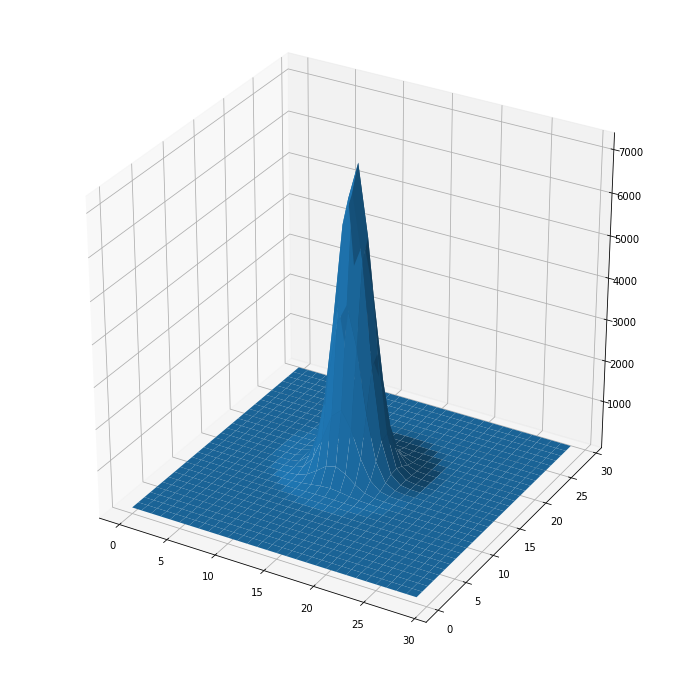

In [9]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
x = range(30)
y = range(30)
X,Y = np.meshgrid(x,y)
Z = np.array(p(Xin, Yin))

ax.plot_surface(X,Y,Z)

Now, putting it all together, fit Moffat functions to stars in all 9 images, plot the result.

Along the way, we are storing the FWHM of the fitted Moffat functions.

832.0 4.08 61_900.fits

831.0 3.79 62_300.fits

831.0 2.93 62_700.fits

831.0 2.58 63_100.fits

831.0 3.12 63_500.fits

831.0 3.16 63_900.fits

830.0 3.63 64_300.fits

830.0 4.84 64_700.fits

829.0 6.13 65_100.fits



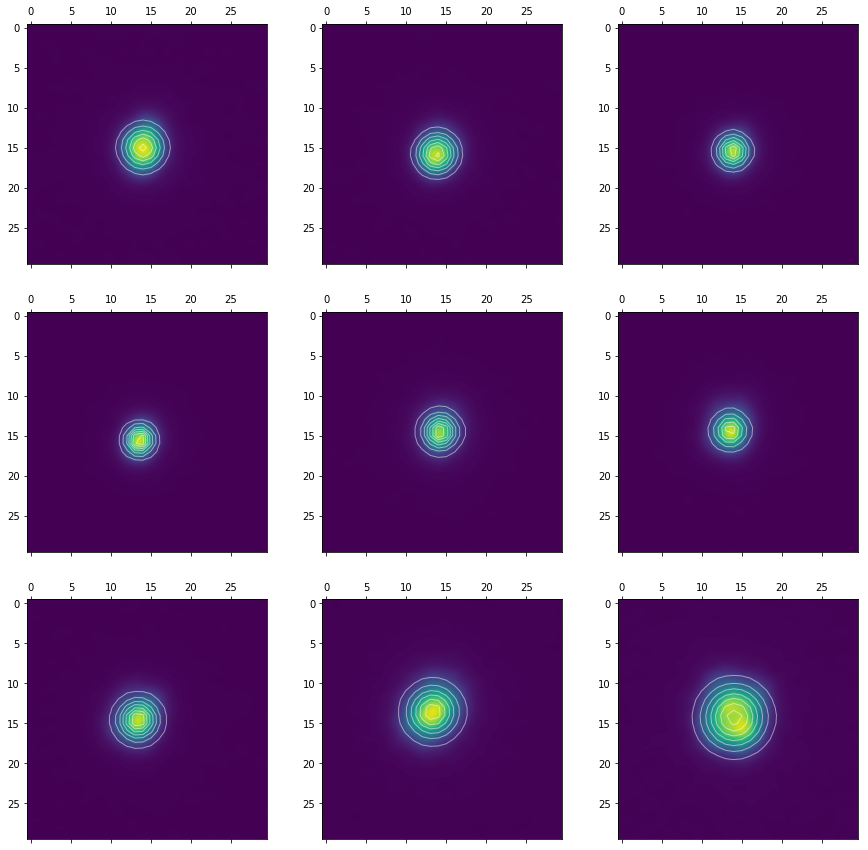

In [10]:
f = open("./gwaves-test2/focuslist")
line = f.readline()
#print(os.path.basename(line))
figsrow = 0
figscol = 0
fig, axs = plt.subplots(3, 3, figsize=(15,15))
while line:
    hdul = fits.open(line.strip())
    data = hdul[0].data
    position = ndimage.measurements.center_of_mass(data[25:125,25:125])
    posx = int(round(position[0])) + 25
    posy = int(round(position[1])) + 25
    position = ndimage.measurements.center_of_mass(data[posx-50:posx+50,
                                                    posy-50:posy+50])
    posx = int(round(position[0])) + 25
    posy = int(round(position[1])) + 25
    myfitdata = data[posx-15:posx+15,
                 posy-15:posy+15]

    thresh = np.percentile(data, 98.0)
    idx = data[:,:] < thresh
    bval = np.average(data[idx])
    #print(bval)
    myfitdata = myfitdata - bval
    
    axs[figsrow, figscol].matshow(myfitdata, interpolation="bicubic")
        
    xmod = models
    p_init = xmod.Moffat2D(x_0=15, y_0=15, alpha=0.0)
        
        
    xfit = fitting
    fit_p = xfit.LevMarLSQFitter()

    Xin, Yin = np.mgrid[0:30, 0:30]
        
    with warnings.catch_warnings():
        # Ignore model linearity warning from the fitter
        warnings.simplefilter('ignore')
        p = fit_p(p_init, Xin, Yin, myfitdata)
            
    #print (p)
    axs[figsrow, figscol].contour(p(Xin, Yin), colors='white', alpha=.5, linewidths=1)
    
    figscol = figscol + 1
    if(figscol > 2):
        figscol = 0
        figsrow = figsrow + 1
        
    a = np.append(a, p.fwhm)
    print(round(bval), round(100.*p.fwhm)/100., os.path.basename(line))
    line = f.readline()
    
            
f.close()


Now, plot the 9 FWHM values and fit a parabola to the data.

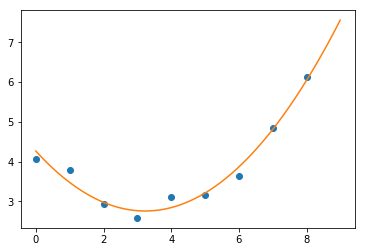

In [11]:
plt.figure()
plt.plot(a, linestyle='None', marker='o')
x = np.arange(len(a))
z = np.polyfit(x, a, 2)
x = np.arange(len(a), step=.01)
plt.plot(x, np.polyval(z,x))